# Descripción del proyecto
Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash. Este conjunto de datos particular fue lanzado públicamente (materiales en inglés) por Instacart en 2017 para una competición Kaggle (materiales en inglés). Los datos reales pueden descargarse directamente de la página de la competición Kaggle.

El conjunto de datos proporcionado tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido y se introdujo valores ausentes y duplicados. Se tuvo cuidado de conservar las distribuciones de los datos originales cuando se hicieron los cambios.

La misión es limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart. Después de responder a cada pregunta, se tendrá una breve explicación de los resultados.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y se usarán todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

se procede a leer los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente y se verifica la información para cada DataFrame creado.

como primera medida podemos abrir cada archivo de datos con un editor de texto para obtener un poco de informacion de cada uno ,realizamos una primera lectura de cada dataframe con pd.read_csv(), si evidenciamos que la lectura de datos no se refleja correctamente (por ejemplo: columnas separadas con otro tipo de separador), procedemos a validar cuales son los parametros que debemos utilizar para obtener la lectura correcta de cada dataframe y validamos nuevamente para verificar los cambios realizados. adicionalmente revisaremos la informacion de cada dataframe con info().

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
data_instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')  #leemos cada uno de los archivos de datos con pd.read_csv()
data_products = pd.read_csv('/datasets/products.csv', sep=';')           #usamos el parametro sep=';' ya que en la lectura inicial evidenciamos que tienen un separador de texto diferente
data_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
data_departments = pd.read_csv('/datasets/departments.csv', sep=';')
data_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame 

print(data_instacart)   #mostramos el dataframe data_instacart y su informacion con el metodo info()
data_instacart.info()

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [4]:
# mostrar información del DataFrame

print(data_products)    #mostramos el dataframe data_products y su informacion con el metodo info()
data_products.info()

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [5]:
# mostrar información del DataFrame

print(data_aisles)   #mostramos el dataframe data_aisles y su informacion con el metodo info()
data_aisles.info()

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame

print(data_departments)  #mostramos el dataframe data_departments y su informacion con el metodo info()
data_departments.info()

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 

In [7]:
# mostrar información del DataFrame

print(data_order_products)  #mostramos el dataframe data_order_products y su informacion con el metodo info()

data_order_products.info(show_counts=True) #Al evidenciar que no nos arroja informacion de los recuentos no nulos por tener demasiados datos, usamos show_counts=True al llamar a info()

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null

## Conclusiones

- Aprendemos la importancia de la lectura correcta de los datos aplicando los parámetros correspondientes, ya que asi podemos visualizar de una forma clara y concisa la información dada por cada dataframe.

- Al obtener información clara podemos evidenciar información de valores no nulos, mediante el cual observamos  que hay valores ausentes en las columnas de algunos dataframes como son: days_since_prior_order, product_name, add_to_cart_order.


# Paso 2. Preprocesamiento de los datos

se realiza el procesamiento de los datos de la siguiente manera:

- Verificar y corregir los tipos de datos (por ejemplo, asegurar que las columnas de ID sean números enteros).
- Identificar y completar los valores ausentes.
- Identificar y eliminar los valores duplicados.

se procederá a explicar qué tipos de valores ausentes y duplicados se encontraron, cómo se completaron o eliminaron y por qué  el uso de esos métodos. 



Inicialmente validaremos los valores duplicados en cada uno de los dataframe con el metodo duplicated() y sum(), adicionalmente revisando que tienen en comun dichos duplicados y los eliminaremos segun corresponda con el metodo drop_duplicates().

Posteriormente revisaremos los valores ausentes en las columnas que evidenciamos ausencia de datos a traves del metodo isna() y realizaremos el llenado de dichos valores segun sea el caso con el metodo fillna()

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print(data_instacart.duplicated().sum())  #utilizamos el metodo duplicated() junto con sum() para obtener el numero de duplicados

print(data_instacart[data_instacart.duplicated()])  #podemos utilizar un filtrado para visualizar los duplicados 



15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Tenemos 15 duplicados, se evidencia que tienen en comun que son pedidos que se hicieron el mismo dia (3) y a la misma hora (2)

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
# realizamos un filtrado con dos condiciones para mostrar los pedidos que se hicieron en el dia 3 (miercoles) y a la hora 2 (2 am).

print(data_instacart[(data_instacart['order_dow'] == 3) & (data_instacart['order_hour_of_day'] == 2)])

    

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   


de acuerdo a lo anterior podriamos indicar que no todos los pedidos realizados el miercoles a las 2 am son duplicados ya que el filtrado anterior nos arroja 121 filas. 

In [10]:
# Elimina los pedidos duplicados

data_instacart.drop_duplicates(inplace= True) # utilizando el método drop_duplicates() para eliminar los duplicados



In [11]:
# Vuelve a verificar si hay filas duplicadas

print(data_instacart.duplicated().sum())  #utilizamos nuevamente el metodo duplicated() junto con sum() para obtener el numero de duplicados



0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(data_instacart.duplicated(subset= 'order_id').sum())  # para verificar duplicados en una columna especifica utilizamos el parametro subset en el metodo duplicated



0



Inicialmente a traves del metodo duplicated() encontramos 15 valores duplicados y usamos un filtrado para visualizar dichos valores y revisar que podrian tener en comun. en lo que evidenciamos que los duplicados encontrados son pedidos realizados el mismo dia y a la misma hora, para lo cual realizamos un filtrado con dos condiciones (dia y hora) para validar si solo los pedidos de ese dia y hora son los duplicados o hubieron mas pedidos en ese dia y hora.
Posteriormente procedemos a eliminar los duplicados con el metodo drop_duplicates() y volvemos a verificar con duplicated si hay filas duplicadas lo cual nos arroja cero duplicados, finalmente hacemos una nueva verificacion de duplicados en la columna de order_id para saber si hay pedidos duplicados, lo cual nos arroja cero nuevamente.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

print(data_products.duplicated().sum())   #utilizamos nuevamente el metodo duplicated() junto con sum() para obtener el numero de duplicados


0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados

print(data_products.duplicated(subset= 'department_id').sum()) # para verificar duplicados en una columna especifica utilizamos el parametro subset en el metodo duplicated



49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

data_products['product_name'] = data_products['product_name'].str.upper()   # utilizamos upper para pasar los nombres a mayusculas junto con .str para que los datos de la columna esten en forma de string

print(data_products.duplicated(subset= 'product_name').sum())  #verificamos nuevamente los duplicados en la columna product_name

print(data_products[data_products.duplicated(subset= 'product_name')]) #utilizamos un filtrado para visualizar los duplicados 


1361
       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71         

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes


products_without_nan = data_products.dropna(subset=['product_name'])  # Filtramos productos con nombres no faltantes

print(products_without_nan.duplicated(subset= 'product_name').sum())  #verificamos nuevamente los duplicados en la columna product_name


print(products_without_nan[products_without_nan.duplicated(subset= 'product_name')]) #utilizamos un filtrado para visualizar los duplicados en la tabla

print(products_without_nan.duplicated(subset= ['product_name','product_id']).sum())  #verificamos que no tenga duplicados engañosos tanto en la columna product id como product name ya que el nombre puede ser igual pero el id del producto diferente

104
       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058        


Inicialmente validamos si hay duplicados con el metodo duplicated() lo cual nos arroja un valor de cero, despues revisamos si hay duplicados de los id de departamentos, lo cual nos arroja un valor de 49673, sin embargo, al revisar nuestro dataframe podemos evidenciar que varios productos pueden pertenecer al mismo departamento, por lo anterior si eliminamos dichos duplicados afectariamos todos nuestros datos. validamos tambien si hay nombres de productos duplicados, primero convertimos los nombres a letras mayusculas para una mejor comparacion, posteriormente validamos los duplicados y obtenemos un valor de 1361, utilizamos un filtrado para visualizar nuestros datos y evidenciamos algunos productos con nombre NaN que tienen en comun que pertenecen al aisle 100 y al departamento 21, sin embargo, dichos valores no deberian ser eliminados ya que la identificacion del producto es diferente e indica que son diferentes productos, solo que por alguna razon no cuentan con un nombre, mas adelante se realizara el respectivo proceso para tratar dichos valores ausentes.
por ulitmo revisamos si hay nombres duplicados de productos no faltantes para lo cual obtuvimos un valor de 104, sin embargo, validamos que estos no sean engañosos ya que pueden tener el mismo nombre pero diferente ID para lo cual verificamos duplicados sobre ambas columnas(product_id y product_name) lo cual nos arrojo un valor de cero.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas

print(data_departments.duplicated().sum())   #utilizamos nuevamente el metodo duplicated() junto con sum() para obtener el numero de duplicados


0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos

print(data_departments.duplicated(subset= 'department_id').sum())  #verificamos nuevamente los duplicados en la columna department_id



0



validamos en el dataframe Departments con el metodo duplicated() si hay filas duplicadas lo cual nos arroja un valor de cero, adicionalmente revisamos unicamente si encontramos duplicados en los ID de departamentos y tampoco se encontraron duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

print(data_aisles.duplicated().sum())   #utilizamos nuevamente el metodo duplicated() junto con sum() para obtener el numero de duplicados


0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos

print(data_aisles.duplicated(subset= 'aisle_id').sum())  #verificamos nuevamente los duplicados en la columna aisle_id

0



validamos en el dataframe Aisles con el metodo duplicated() si hay filas duplicadas lo cual nos arroja un valor de cero, adicionalmente revisamos unicamente si encontramos duplicados en los ID de pasillos y tampoco se encontraron duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

print(data_order_products.duplicated().sum())   #utilizamos nuevamente el metodo duplicated() junto con sum() para obtener el numero de duplicados


0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(data_order_products.duplicated(subset= ['order_id','product_id']).sum())  # para verificar duplicados engañosos verificamos si hay duplicados tanto en la columna order_id y en la columna product_id


0



validamos en el dataframe Order Products con el metodo duplicated() si hay filas duplicadas lo cual nos arroja un valor de cero, adicionalmente revisamos si encontramos duplicados engañosos para lo cual verificamos duplicados tanto la columna order_id como en product_id, lo cual nos arroja un valor de cero.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

print(data_products['product_name'].isna().sum())    #usamos el metodo isna y sum para validar el numero de valores ausentes

print(data_products[data_products['product_name'].isna()])  # mostramos el dataframe solo con valores ausentes para tener una visualizacion de los datos.

1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]



hay 1258  valores ausentes, al mostrar los valores ausentes de la columna product_name podemos visualizar que dichos valores estan en el mismo aisle y el mismo department.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100

#filtramos con 2 condiciones, si los nombres de productos ausentes & si el id del aisle es igual a 100

data_products_filtered_1 = (data_products['product_name'].isna()) & (data_products['aisle_id'] == 100)

data_products[data_products_filtered_1]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



al filtrar si todos los nombres de los productos ausentes estan relacionados con el aisle id 100, evidenciamos que si ya que despues del filtrado obtenemos la misma cantidad (1258) que los valores ausentes encontrados inicialmente.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

#filtramos con 2 condiciones, si los nombres de productos ausentes & si el id del department es igual a 21

data_products_filtered_2 = (data_products['product_name'].isna()) & (data_products['department_id'] == 21) 

data_products[data_products_filtered_2]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [26]:

# Revisamos si nos arroja valores ausentes cuando el department_id es diferente de 21 Y el aisle_id es diferente de 100

data_products_without_21_100 = (data_products['product_name'].isna()) & (data_products['department_id'] != 21) & (data_products['aisle_id'] != 100)

data_products[data_products_without_21_100]

print(data_products_without_21_100.isna().sum())

0



al filtrar si todos los nombres de los productos ausentes estan relacionados con el department id 21 y el aisle 100, evidenciamos que si ya que despues del filtrado obtenemos la misma cantidad (1258) que los valores ausentes encontrados inicialmente.
Posteriormente revisamos si nos arroja valores ausentes cuando el department_id es diferente de 21 Y el aisle_id es diferente de 100, lo cual obtenemos un valor de cero  valore ausentes

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.



department_21 = data_departments[data_departments['department_id'] == 21]  # filtramos el dataframe departments para conocer que datos tiene cuando el ID es 21 

aisle_100 = data_aisles[data_aisles['aisle_id'] == 100]  # filtramos el dataframe aisles para conocer que datos tiene cuando el ID es 100 

print(department_21)
print()
print(aisle_100)

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


In [28]:


#Rellenamos los valores ausentes de la columna product_name por la palabra Unknown, usamos el metodo fillna()

data_products['product_name'].fillna('Unknown', inplace= True)

print(data_products['product_name'].isna().sum())    #validamos nuevamente con el metodo isna y sum si tenemos valores ausentes



0



se evidencia que al revisar las tablas de departments y aisles los datos del pasillo con id 100 y departamento con id 21 nos arroja "missing", lo que nos indica que para los productos con datos ausentes no les corresponde un pasillo y un departamento ya que el producto es desconocido.


al encontrar los nombres de productos ausentes procedemos a rellenar dichos valores a traves del metodo fillna() por la palabra "Unknown", ya que dichos valores no deben ser eliminados porque tienen un ID diferente. una vez realizado el proceso volvemos a validar si tenemos valores ausentes y nos da como resultado cero.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes

print(data_instacart['days_since_prior_order'].isna().sum())  # usamos el metodo isna y sum para validar el numero de valores ausentes

print(data_instacart[data_instacart['days_since_prior_order'].isna()])  # mostramos el dataframe solo con valores ausentes para tener una visualizacion de los datos.


28817
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100               

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

#filtramos con 2 condiciones, los valores ausentes de la columna days_since_prior_order  & si el order_number es diferente a 1

orders_filtered = (data_instacart['days_since_prior_order'].isna()) & (data_instacart['order_number'] != 1)


print(orders_filtered.isna().sum())

0


In [31]:

#Rellenamos los valores ausentes de la columna days_since_prior_order por valor de 0 ya que son las primeras ordenes, lo hacemos con el metodo fillna

data_instacart['days_since_prior_order'].fillna(0, inplace= True)

print(data_instacart['days_since_prior_order'].isna().sum())  # usamos nuevament el metodo isna y sum para validar si despues de lo anterior hay valores ausentes



0



inicialmente validamos los valores ausentes con el metodo isna, el cual nos arroja 28817 valores ausentes, mostramos el dataframe con los valores ausentes para visualizar un poco los datos y evidenciamos que los valores ausentes de la columna days_since_prior_order tienen en comun que el numero de orden es 1. posterior a esto tenemos que validar que esa conclusion sea cierta para todos esos valores ausentes por lo que realizamos un filtro donde muestre los valores ausentes de dicha columna donde el numero de orden es diferente a 1, lo cual nos da un valor de cero valores ausentes.
procedemos a remplazar dichos valores ausentes por 0 ya que corresponden a la primer orden y no podriamos eliminarlos debido a que perderiamos los datos de todas las primeras ordenes. una vez rellenados los valores con el metodo fillna, validamos nuevamente los valores ausentes y nos arroja un valor de cero.

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes

print(data_order_products['add_to_cart_order'].isna().sum())  # usamos el metodo isna y sum para validar el numero de valores ausentes

print(data_order_products[data_order_products['add_to_cart_order'].isna()])  # mostramos el dataframe solo con valores ausentes para tener una visualizacion de los datos.


836
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
 
print(data_order_products['add_to_cart_order'].describe())    # usamos el metodo describe() para conocer los valores minimos y maximos de la columna
    

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64



encontramos 836 valores ausentes, adicionalmente validamos el valor minimo (1) y maximo (64) de la columna.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

# usamos el metodo isna para los valores ausentes de la columna add_to_cart_order y que nos muestre solo los valores de order_id

orders_id_filtered = data_order_products[data_order_products['add_to_cart_order'].isna()]['order_id']

print(orders_id_filtered)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

orders_with_missing_add_to_cart = data_order_products[data_order_products['add_to_cart_order'].isna()]  #Filtramos las filas con valores ausentes en add_to_cart_order

grouped_orders = orders_with_missing_add_to_cart.groupby('order_id')['product_id'].count().min()  #usamos groupby para agrupar las filas con datos ausentes en add_to_cart_order por su order_id y contamos el número de product_id en cada pedido con el metodo count y usamos el metodo min() para obtener el valor minimo de ese conteo


print(grouped_orders)


1



al agrupar las filas con datos ausentes por su order_id podemos determinar la cantidad de productos que hay por cada pedido(usando el metodo count), lo cual nos permite revisar exactamente cuantos productos hay por pedido (ningun pedido tiene mas de 64 productos). al finalizar usamos el metodo min() para determinar el valor minimo de dicho conteo, el cual nos arroja un valor de 1.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


data_order_products['add_to_cart_order'].fillna(999, inplace= True) # usamos el metodo fillna() para rellenar los valores ausentes por 999

data_order_products['add_to_cart_order']= data_order_products['add_to_cart_order'].astype('int') #usamos el metodo astype para convertir la columna a entero

print(data_order_products['add_to_cart_order'].isna().sum())  # verificamos con el metodo isna que no tengamos valores ausentes

data_order_products.info()   # verificamos que la columna se haya convertido en entero

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


realizamos el remplazo de los valores ausentes de la columna add_to_cart_order por '999', una vez realizado lo anterior procedemos a convertir dicha columna a valores enteros a traves del metodo astype, por ultimo nuevamente verificamos con el metodo isna si hay valores ausentes, lo que nos arroja un valor de cero, adicionalmente llamamos al metodo info con el fin de verificar que nuestra columna sea de tipo entero. 

## Conclusiones


- En el dataframe data_instacart, se encontraron 15 filas duplicadas y se eliminaron correctamente. al validar valores ausentes se encuentran 28817 los cuales todos coinciden que pertenecen a la orden numero 1, sin embargo después del filtrado donde la orden es diferente a 1 encontramos cero valores ausentes.

- En el dataframe data_products, se encontraron 1,361 nombres de productos duplicados, de los cuales 104 seguían duplicados tras no tener en cuenta valores faltantes. Todos esos productos duplicados tenían diferentes IDs de producto. al validar valores ausentes encontramos que dichos valores tienen relación con el departamento 21 y aisle 100 los cuales indican que no tienen asignado un department ni aisle, al revisar valores ausentes que no pertenezcan al departamento 21 y al aisle 100 obtenemos cero valores ausentes.

- En el dataframe orders_products, no se encontraron filas duplicadas ni duplicados engañosos. se encuentran 836 valores ausentes los cuales son rellenados correctamente. 

- En el dataframe data_aisles no se evidencio duplicados ni datos ausentes

- En el dataframe data_departments no se evidencio duplicados ni datos ausentes



# Paso 3. Análisis de los datos

Una vez los datos están procesados y listos, se hace el siguiente análisis:

## Primer Análisis

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### Verificar que los valores sean sensibles

In [37]:
#podemos mostrar con value_counts los valores unicos que aparecen en la columna order_hour_of_day

data_instacart['order_hour_of_day'].value_counts().sort_index()



0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [38]:
#podemos mostrar con value_counts los valores unicos que aparecen en la columna order_dow

data_instacart['order_dow'].value_counts().sort_index() 


0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Escribe aquí tus conclusiones

evidenciamos que los datos de ambas columnas son razonables ya que la columna order_hour_of_day oscila en valores de 0 a 23  y la columna order_dow oscila en valores de 0 a 6

### Para cada hora del día, ¿cuántas personas hacen órdenes?

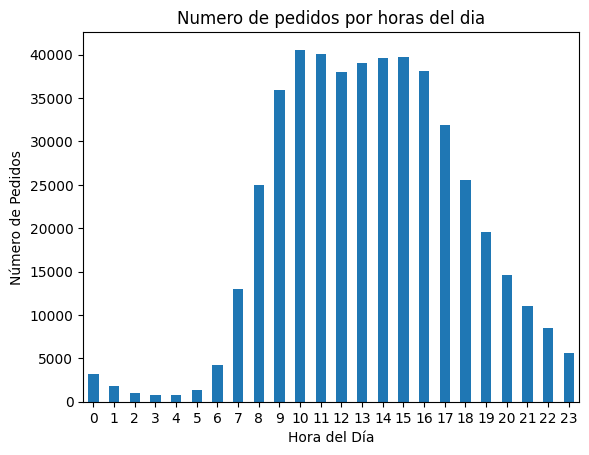

In [39]:


import pandas as pd
from matplotlib import pyplot as plt

order_per_hour = data_instacart['order_hour_of_day'].value_counts().sort_index()  #contamos cada valor unico de la columna order_hour_of_day con el metodo value_counts y los ordenamos con sort_index

#procedemos a generar la grafica con con el metodo plot() y incluimos varios parametros parar generar la grafica lo mas profesional

order_per_hour.plot(kind= 'bar',
                    title= 'Numero de pedidos por horas del dia',
                    xlabel= 'Hora del Día',
                    ylabel= 'Número de Pedidos',
                    rot= 0,
                   )

plt.show()




De acuerdo a la informacion de la grafica, evidenciamos que a las 10:00 hrs es la hora donde mas hay pedidos (40000) y las 4:00 hrs es la hora donde menos pedidos realizan las personas (menos de 2500).

vemos tambien que en el rango entre las 9:00 y 16:00 es donde mas pedidos se realizan ya que oscilan entre 35000 y 40000

### ¿Qué día de la semana compran víveres las personas?

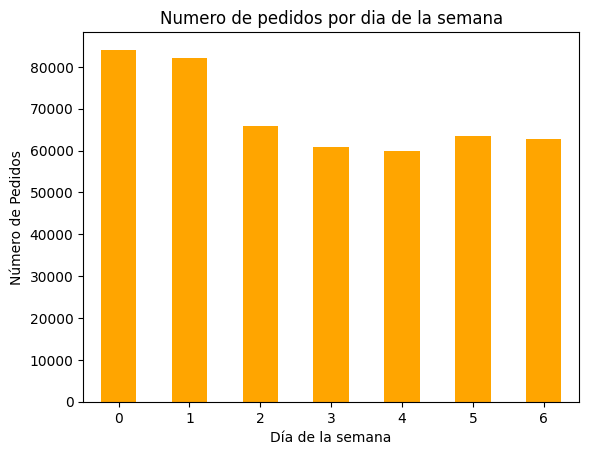

In [40]:

#contamos cada valor unico de la columna order_dow con el metodo value_counts y los ordenamos con sort_index
    
order_per_day = data_instacart['order_dow'].value_counts().sort_index() 

#procedemos a generar la grafica con con el metodo plot() y incluimos varios parametros parar generar la grafica lo mas profesional

order_per_day.plot(kind= 'bar',
                   title= 'Numero de pedidos por dia de la semana',
                   xlabel= 'Día de la semana',
                   ylabel= 'Número de Pedidos',
                   color= 'orange',
                   rot= 0,
                  )

plt.show()



De acuerdo a lo reflejado en la grafica evidenciamos que los dias donde mas compran viveres las personas son domingo y lunes, siendo el domingo el mayor dia con mas de 80000 pedidos. 
Por el contrario el dia que menos compran viveres es el dia jueves con un poco menos de 60000 pedidos.

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

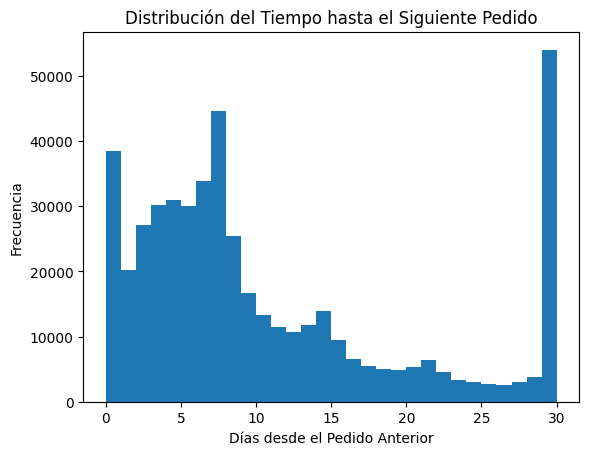

In [41]:

#procedemos a generar la grafica (histograma) del dataframe para la columna days_since_prior_order con el metodo plot() y incluimos varios parametros parar generar la grafica lo mas profesional

data_instacart['days_since_prior_order'].plot(kind= 'hist',
                                              bins= 30,
                                              title= 'Distribución del Tiempo hasta el Siguiente Pedido',
                                             )

plt.xlabel('Días desde el Pedido Anterior')
plt.ylabel('Frecuencia')

plt.show()



el histograma nos muestra la distribución del tiempo que las personas esperan hasta hacer su siguiente pedido, teniendo en cuenta su valor maximo podriamos decir que hay mas de 50.000 ordenes cuando han pasado 30 dias desde su ultima orden lo que podria decirnos que un gran número de clientes tiende a hacer su siguiente pedido 30 días después del pedido anterior. Este comportamiento indica que hay un hábito de compra mensual  de los clientes.
adicionalmente vemos que su valor minimo se da menos de 5000 ordenes cuando han pasado 27 dias, lo que nos podria indicar que los clientes podrian preferir ciclos de compra mas largos o mucho mas cortos.

## Segundo Análisis

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:

# almacenamos en una variable las ordenes hechas el dia miercoles y otra variable para cuando las ordenes fueron hechas el dia sabado

order_wednesday = data_instacart['order_dow'] == 3

order_saturday = data_instacart['order_dow'] == 6



In [43]:

# en una variable usamos el metodo value counts para guardar el conteo de las ordenes hechas el miercoles por hora del dia

count_wednesday = data_instacart[order_wednesday]['order_hour_of_day'].value_counts().sort_index()

# en una variable usamos el metodo value counts para guardar el conteo de las ordenes hechas el sabado por hora del dia

count_saturday = data_instacart[order_saturday]['order_hour_of_day'].value_counts().sort_index()

print(count_wednesday)
print(count_saturday)

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


In [44]:

#unimos ambas variables en un solo dataframe a traves del metodo concat

concat_wed_sat = pd.concat([count_wednesday, count_saturday], axis=1)

#renombramos las columnas con el metodo columns

concat_wed_sat.columns = ['Wednesday', 'Saturday']

print(concat_wed_sat)


    Wednesday  Saturday
0         373       464
1         215       254
2         106       177
3         101       125
4         108       118
5         170       161
6         643       451
7        1732      1619
8        3125      3246
9        4490      4311
10       5026      4919
11       5004      5116
12       4688      5132
13       4674      5323
14       4774      5375
15       5163      5188
16       4976      5029
17       4175      4295
18       3463      3338
19       2652      2610
20       1917      1847
21       1450      1473
22       1154      1185
23        718       893


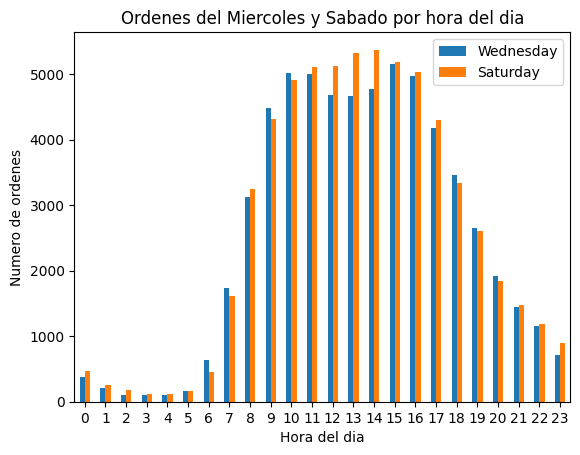

In [45]:
# Generamos la grafica del nuevo dataframe unido con el metodo plot() y incluimos varios parametros parar generar la grafica lo mas profesional

concat_wed_sat.plot(kind= 'bar',
                   title='Ordenes del Miercoles y Sabado por hora del dia',
                   xlabel='Hora del dia',
                   ylabel='Numero de ordenes',
                   rot= 0 
                   )

plt.show()



de acuerdo a la grafica podemos evidenciar que tanto para el dia miercoles y sabado se emiten la mayor cantidad de ordenes entre las 10AM y 4PM, lo que evidencia mayor preferencia de las personas por realizar compras en dichas horas.

en ambos dias vemos un crecimiento gradual desde las horas de la mañana hasta las horas de la tarde donde empieza a descender nuevamente de forma gradual, vemos el pico para el dia miercoles alrededor de las 3PM con mas de 5000 ordenes y para el dia sabado su pico es a las 2PM con mas de 5000 ordenes tambien pero ligeramente superior al dia miercoles.

Aunque los patrones son similares, los sábados tienden a tener un número ligeramente mayor de pedidos en las horas pico en comparación con los miércoles, lo que podría indicar que más personas hacen compras los fines de semana.

### ¿Cuál es la distribución para el número de pedidos por cliente?

In [46]:

# contamos el numero de pedidos por cliente con el metodo value_counts

order_counts = data_instacart['user_id'].value_counts()
print(order_counts)

# ahora contamos la frecuencia de cada numero de pedidos con el metodo value_counts y ordenamos con sort_index

order_counts_distribution = order_counts.value_counts().sort_index()

print(order_counts_distribution)


149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: user_id, dtype: int64


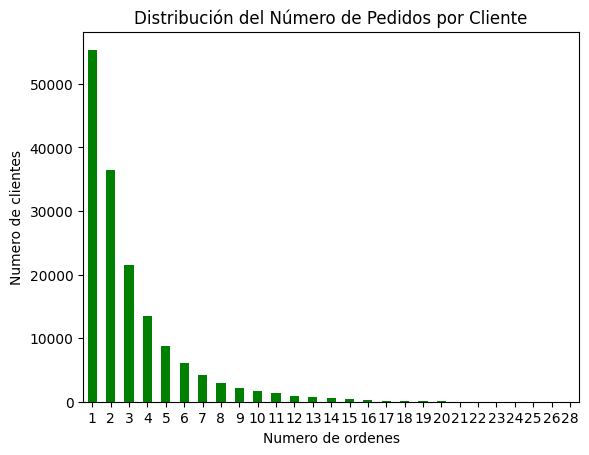

In [47]:
# Generamos la grafica de order_counts_distribution con el metodo plot() y incluimos varios parametros parar generar la grafica lo mas profesional

order_counts_distribution.plot(kind= 'bar',
                               title='Distribución del Número de Pedidos por Cliente',
                               xlabel='Numero de ordenes',
                               ylabel='Numero de clientes',
                               color= 'Green',
                               rot= 0                               
                              )
                   
              
plt.show()




De acuerdo a lo mostrado en la grafica evidenciamos que la mayoria de clientes solo realizan 1 orden, para nuestro caso aproximadamente 55.000 clientes realizaron 1 sola orden. y a medida que aumenta la cantidad de ordenes los clientes que realizan dichas ordenes disminuye considerablemente. el numero de clientes que realizaron 2 ordenes fue de aproximadamente 36.000, y para los que hicieron 3 ordenes fue alrededor de 21.000 clientes. 
Muy pocos clientes realizaron más de 20 pedidos. Solo 3 clientes hicieron 24 pedidos, y solo 1 cliente hizo 25, 26, y 28 pedidos cada uno.

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [48]:

# mostramos los valores unicos con value_counts de la columna product id del dataframe data_order_products, mostramos los primeros 20 resultados con head(), y reseteamos el indice para visualizar mejor que son los 20 products_id mas vendidos

product_counts = data_order_products['product_id'].value_counts().head(20).reset_index()

#nombramos las columnas del dataframe anterior para mejor visualizacion de los datos
product_counts.columns = ['product_id', 'count']

print(product_counts)

    product_id  count
0        24852  66050
1        13176  53297
2        21137  37039
3        21903  33971
4        47209  29773
5        47766  24689
6        47626  21495
7        16797  20018
8        26209  19690
9        27845  19600
10       27966  19197
11       22935  15898
12       24964  15292
13       45007  14584
14       39275  13879
15       49683  13675
16       28204  12544
17        5876  12232
18        8277  11993
19       40706  11781


In [49]:

# Unimos el anterior dataframe product_counts con el dataframe data_products por la columna product_id, lo hacemos con el metodo merge

top_products = product_counts.merge(data_products, on= 'product_id')



In [50]:
#Mostramos las columnas que nos interesa de la anterior union, mostramos 'product_id', 'count', 'product_name'

print(top_products[['product_id', 'count', 'product_name']])



    product_id  count              product_name
0        24852  66050                    BANANA
1        13176  53297    BAG OF ORGANIC BANANAS
2        21137  37039      ORGANIC STRAWBERRIES
3        21903  33971      ORGANIC BABY SPINACH
4        47209  29773      ORGANIC HASS AVOCADO
5        47766  24689           ORGANIC AVOCADO
6        47626  21495               LARGE LEMON
7        16797  20018              STRAWBERRIES
8        26209  19690                     LIMES
9        27845  19600        ORGANIC WHOLE MILK
10       27966  19197       ORGANIC RASPBERRIES
11       22935  15898      ORGANIC YELLOW ONION
12       24964  15292            ORGANIC GARLIC
13       45007  14584          ORGANIC ZUCCHINI
14       39275  13879       ORGANIC BLUEBERRIES
15       49683  13675            CUCUMBER KIRBY
16       28204  12544        ORGANIC FUJI APPLE
17        5876  12232             ORGANIC LEMON
18        8277  11993  APPLE HONEYCRISP ORGANIC
19       40706  11781    ORGANIC GRAPE T

Escribe aquí tus conclusiones


De acuerdo a la tabla anterior podemos evidenciar que la mayoria de los productos son organicos, lo que indicaria una preferencia de los clientes por productos organicos al momento de comprar.
Vemos que la mayoria de los productos son frutas y vegetales, lo que nos indica que las personas tienden a comprar productos saludables.
Vemos que los productos muy populares son bananos, fresas, aguacates y limones, lo que podria indicar que son articulos con promociones y son de venta rapida

## Tercer Análisis

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
# Agrupamos el DataFrame data_order_products por order_id y contamos cuántos product_id hay en cada pedido

items_per_order = data_order_products.groupby('order_id')['product_id'].count()
print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [52]:
# Usamos el metodo describe para obtener informacion de nuestro dataframe como el promedio, mediana o desviacion estandar

print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


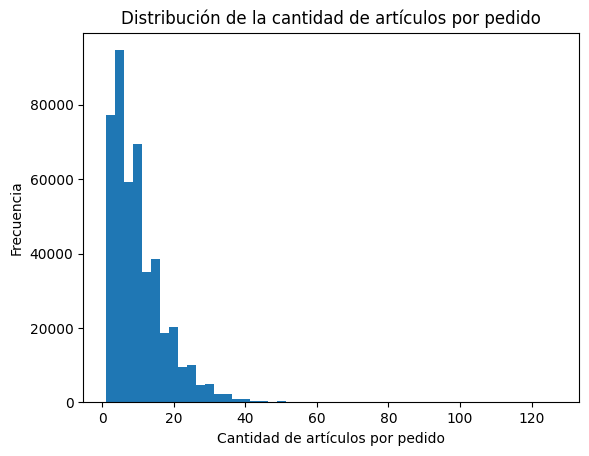

In [53]:
# para visualizar la distribucion graficamos un histograma con el metodo plot() y incluimos varios parametros parar generar la grafica lo mas profesional

items_per_order.plot(kind= 'hist',
                     bins= 50,
                     title= 'Distribución de la cantidad de artículos por pedido',
                    )

plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Frecuencia')

plt.show()


de acuerdo al histograma este nos  indica que la mayoría de los pedidos contienen una cantidad pequeña de productos, pero hay algunos pedidos con una cantidad mucho mayor de productos.
La barra más alta se encuentra en el rango más bajo de la cantidad de productos por pedido, lo que sugiere que el valor más frecuente está cerca de los valores pequeños (entre 1 y 5 productos por pedido, aproximadamente).
La mayoría de los pedidos tienen menos de 20 artículos, y muy pocos pedidos superan esa cantidad.

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:

# Filtramos los productos que han sido reordenados 
reordered_products = data_order_products[data_order_products['reordered'] == 1]


In [55]:


#mostramos los valores unicos con value_counts de la columna product id del dataframe reordered_products, mostramos los primeros 20 resultados con head(), y reseteamos el indice para visualizar mejor que son los 20 principales productos

reordered_product_counts = reordered_products['product_id'].value_counts().head(20).reset_index()

#nombramos las columnas del dataframe anterior para mejor visualizacion de los datos
reordered_product_counts.columns = ['product_id', 'reorder_count']

print(reordered_product_counts)


    product_id  reorder_count
0        24852          55763
1        13176          44450
2        21137          28639
3        21903          26233
4        47209          23629
5        47766          18743
6        27845          16251
7        47626          15044
8        27966          14748
9        16797          13945
10       26209          13327
11       22935          11145
12       24964          10411
13       45007          10076
14       49683           9538
15       28204           8989
16        8277           8836
17       39275           8799
18        5876           8412
19       49235           8389


In [56]:

# Unimos el anterior dataframe reordered_product_counts con el dataframe data_products por la columna product_id, lo hacemos con el metodo merge

top_reordered_products = reordered_product_counts.merge(data_products, on= 'product_id')


In [57]:

#Mostramos las columnas que nos interesa de la anterior union, mostramos 'product_id', 'reorder_count', 'product_name' , los cuales son los 20 principales productos reordenados

print(top_reordered_products[['product_id', 'reorder_count', 'product_name']])


    product_id  reorder_count              product_name
0        24852          55763                    BANANA
1        13176          44450    BAG OF ORGANIC BANANAS
2        21137          28639      ORGANIC STRAWBERRIES
3        21903          26233      ORGANIC BABY SPINACH
4        47209          23629      ORGANIC HASS AVOCADO
5        47766          18743           ORGANIC AVOCADO
6        27845          16251        ORGANIC WHOLE MILK
7        47626          15044               LARGE LEMON
8        27966          14748       ORGANIC RASPBERRIES
9        16797          13945              STRAWBERRIES
10       26209          13327                     LIMES
11       22935          11145      ORGANIC YELLOW ONION
12       24964          10411            ORGANIC GARLIC
13       45007          10076          ORGANIC ZUCCHINI
14       49683           9538            CUCUMBER KIRBY
15       28204           8989        ORGANIC FUJI APPLE
16        8277           8836  APPLE HONEYCRISP 


de acuerdo a la tabla anterior, el banano el artículo más reordenado con una frecuencia de 55.763. Esto podria indicar que los bananos son un producto básico en las compras repetidas de los clientes.
seguimos viendo la tendencia de productos organicos, La mayoría de los artículos más reordenados son productos orgánicos. Esto sugiere una preferencia de los clientes por productos orgánicos,lo que puede dar a entender una tendencia hacia el consumo de alimentos más saludables.
Los productos frescos como frutas y verduras son mayoria, Esto puede implicar que los clientes hacen compras regulares de productos frescos.

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [58]:
# Contamos el total de pedidos para cada producto
total_orders = data_order_products['product_id'].value_counts().reset_index()
total_orders.columns = ['product_id', 'total_orders']

# Contamos el total de reordenes para cada producto
reordered_orders = data_order_products[data_order_products['reordered'] == 1]['product_id'].value_counts().reset_index()
reordered_orders.columns = ['product_id', 'reordered_orders']


In [59]:
# Unimos las dos tablas en base al product_id
order_stats = total_orders.merge(reordered_orders, on='product_id') 

# Calculamos la proporción de reordenes respecto al total de pedidos, creamos una nueva columna llamada reorder_proportion
order_stats['reorder_proportion'] = order_stats['reordered_orders'] / order_stats['total_orders']

# Unimos esta información con los nombres de los productos
order_stats_with_names = order_stats.merge(data_products, on='product_id')


In [60]:
# Mostramos las columnas relevantes: product_id, product_name, total_orders, reordered_orders, reorder_proportion

print(order_stats_with_names[['product_id', 'product_name', 'total_orders', 'reordered_orders', 'reorder_proportion']])

       product_id                                       product_name  \
0           24852                                             BANANA   
1           13176                             BAG OF ORGANIC BANANAS   
2           21137                               ORGANIC STRAWBERRIES   
3           21903                               ORGANIC BABY SPINACH   
4           47209                               ORGANIC HASS AVOCADO   
...           ...                                                ...   
36223       46197                              LIAR'S DICE ZINFANDEL   
36224       37597                                    TEN ORANGE SODA   
36225       24659           PS100 PHOSPHATIDYLSERINE 100 MG SOFTGELS   
36226        5631               FRASHMATIC AIR FRESHENER STARTER KIT   
36227       41668  STEEL CUT WITH PROTEIN MAPLE & BROWN SUGAR OAT...   

       total_orders  reordered_orders  reorder_proportion  
0             66050             55763            0.844254  
1             5

de acuerdo a la tabla, los Bananos tienen una reorder_proportion de 0.844, lo que significa que aproximadamente el 84.4% de las veces que se piden, los clientes vuelven a pedirlas. adicionalmente Bag of Organic Bananas y Organic Strawberries tienen proporciones de 0.834 y 0.773 respectivamente, lo que indica una alta recurrencia del cliente hacia estos productos.
los productos con una alta recurrencia deben ser revisados para que siempre esten en inventario y se pueda satisfacer al cliente.

### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:

# Unimos el DataFrame de data_order_products con el de data_instacart para obtener el user_id
order_products_and_instacart_merged = data_order_products.merge(data_instacart, on= 'order_id')

# Calculamos el total de productos pedidos por cliente agrupando por la columna user id y contando los product id
total_products_per_customer = order_products_and_instacart_merged.groupby('user_id')['product_id'].count().reset_index()

total_products_per_customer.columns = ['user_id', 'total_products']  #cambiamos el nombre de las columnas para mejor entendimiento de la tabla

print(total_products_per_customer)

        user_id  total_products
0             2              26
1             4               2
2             5              12
3             6               4
4             7              14
...         ...             ...
149621   206203              27
149622   206206              21
149623   206207              46
149624   206208             125
149625   206209              25

[149626 rows x 2 columns]


In [67]:
# Calculamos el total de productos reordenados por cliente filtrando el dataframe unido donde reordered es 1 y despues agrupando por la columna user id y contando los product id
reordered_products_per_customer = order_products_and_instacart_merged[order_products_and_instacart_merged['reordered'] == 1].groupby('user_id')['product_id'].count().reset_index()

reordered_products_per_customer.columns = ['user_id', 'reordered_products'] #cambiamos el nombre de las columnas para mejor entendimiento de la tabla

print(reordered_products_per_customer)


        user_id  reordered_products
0             2                   1
1             5                   8
2             7                  13
3            11                   3
4            12                   3
...         ...                 ...
132986   206203                   6
132987   206206                  15
132988   206207                  41
132989   206208                  87
132990   206209                   8

[132991 rows x 2 columns]


In [72]:
#unimos las dos tablas anteriores para poder obtener las estadisticas por cliente

user_order_stats = total_products_per_customer.merge(reordered_products_per_customer, on='user_id')

# Calculamos la proporción de productos reordenados, creamos una nueva columna llamada reorder_proportion

user_order_stats['reorder_proportion'] = user_order_stats['reordered_products'] / user_order_stats['total_products']

print(user_order_stats)

print(user_order_stats['reorder_proportion'].describe())  #usamos el metodo describe en la columna reorder_proportion para obtener informacion descriptiva 


        user_id  total_products  reordered_products  reorder_proportion
0             2              26                   1            0.038462
1             5              12                   8            0.666667
2             7              14                  13            0.928571
3            11              15                   3            0.200000
4            12              12                   3            0.250000
...         ...             ...                 ...                 ...
132986   206203              27                   6            0.222222
132987   206206              21                  15            0.714286
132988   206207              46                  41            0.891304
132989   206208             125                  87            0.696000
132990   206209              25                   8            0.320000

[132991 rows x 4 columns]
count    132991.000000
mean          0.556751
std           0.248833
min           0.014925
25%           0.3

de acuerdo a la tabla, el promedio de la proporción de productos reordenados es aproximadamente 0.557. Esto indicaria que en promedio, los clientes reordenan alrededor del 55.7% de los productos que compran.
El 25% de los clientes tienen una proporción de reordenes inferior a 36.36%, lo que indicaria que estos clientes suelen probar nuevos productos con mayor frecuencia.
La mediana (50%) es 0.562, indicando que la mitad de los clientes reordenan menos del 56.2% de los productos.

### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [73]:
# Filtramos los productos que fueron agregados primero al carrito
first_added_products = data_order_products[data_order_products['add_to_cart_order'] == 1]


In [78]:
# Contamos la frecuencia de cada product_id entre los productos que fueron agregados primero al carrito

first_added_counts = first_added_products['product_id'].value_counts().head(20).reset_index()
first_added_counts.columns = ['product_id', 'count']


In [77]:
# Unimos la anterior tabla con el dataframe products para obtener el nombre del producto
top_first_added_products = first_added_counts.merge(data_products, on='product_id')

# Mostramos los 20 principales productos que las personas ponen primero en sus carritos
print(top_first_added_products[['product_id', 'count', 'product_name']])

    product_id  count                 product_name
0        24852  15562                       BANANA
1        13176  11026       BAG OF ORGANIC BANANAS
2        27845   4363           ORGANIC WHOLE MILK
3        21137   3946         ORGANIC STRAWBERRIES
4        47209   3390         ORGANIC HASS AVOCADO
5        21903   3336         ORGANIC BABY SPINACH
6        47766   3044              ORGANIC AVOCADO
7        19660   2336                 SPRING WATER
8        16797   2308                 STRAWBERRIES
9        27966   2024          ORGANIC RASPBERRIES
10       44632   1914   SPARKLING WATER GRAPEFRUIT
11       49235   1797          ORGANIC HALF & HALF
12       47626   1737                  LARGE LEMON
13         196   1733                         SODA
14       38689   1397     ORGANIC REDUCED FAT MILK
15       26209   1370                        LIMES
16       12341   1340                HASS AVOCADOS
17        5785   1310  ORGANIC REDUCED FAT 2% MILK
18       27086   1309          


De acuerdo a la anterior tabla, Banana y Bag of Organic Bananas son los dos productos más comunes que las personas agregan primero a sus carritos, con 15,562 y 11,026 adiciones respectivamente. Esto indicaria una fuerte preferencia por productos frescos y saludables.
Un alto número de los productos en la lista son orgánicos, lo que indica una preferencia significativa por productos orgánicos entre los clientes.
La lista incluye una diversidad de productos, desde frutas y vegetales hasta lácteos y bebidas. Esto indica que las preferencias de los clientes abarcan varias categorías de productos.

# Conclusión general del proyecto:

En resumen, los datos analizados revelan varios patrones y tendencias importantes en el comportamiento de compra de los clientes. Los clientes tienden a hacer pedidos principalmente durante la mañana y la tarde, con un mayor número de pedidos al final (domingo) e inicio (lunes) de la semana. Prefieren productos orgánicos y saludables, realizan pedidos relativamente pequeños y muestran hábitos de compra recurrentes, especialmente mensuales.
Lo anterior podria ayudar a la empresa a realizar estrategias de marketing sobre los dias de la semana donde deben enfocarse, cuando realizar promociones, que inventario de productos deben surtir mas y que estrategias hacer para los productos menos adquiridos.
